# Prediksi sakit jantung menggunakan jaringan saraf tiruan

Machine learning merupakan bidang studi yang memanfaatkan prinsip ilmu komputer dan statistika untuk membuat model statistik. Model ini pada umumnya digunakan untuk mengajari komputer melakukan dua hal yakni untuk membuat prediksi masa depan berdasarkan data di masa lalu dan/atau menjelajahi pola dalam data.Terdapat dua jenis teknik machine learning yaitu supervised learning dan unsupervised learning. Dalam supervised learning, mesin belajar memprediksi sampel uji berikutnya berdasarkan data yang telah diberi label sebelumnya.
Supervised learning terdiri dari dua jenis yaitu classification dan regression. Classification (klasifikasi) digunakan ketika kita perlu memprediksi apakah sebuah sampel uji merupakan bagian dari salah satu kelas atau kategori yang telah ditentukan. Sedangkan regresi digunakan ketia kita perlu memprediksi sebuah variabel continuous seperti harga barang.

Penyakit jantung adalah pembunuh nomor satu menurut statistik Organisasi Kesehatan Dunia (WHO). [1] 
Jutaan orang meninggal setiap tahun karena penyakit jantung dan sejumlah besar orang menderita penyakit jantung. 
Prediksi penyakit jantung dini memainkan peran penting untuk perawatan. Jika penyakit jantung dapat diprediksi 
sebelumnya, banyak kematian pasien akan dicegah dan juga cara pengobatan yang lebih akurat dan efisien dapat diberikan.

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import MinMaxScaler,OneHotEncoder
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split 
from keras.optimizers import Adam
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.activations import relu

from keras.utils import to_categorical
from sklearn.metrics import confusion_matrix

# Dataset
    Data set yang dipakai adalah Data heart disease uci . Data ini bisa di download di uci akan tetapi saya mendownloadnya dari kaggle. Jadi kita bisa dapatkan baik di uci ataupun di kaggle
    Link Dataset heart disease  : 
    
https://www.kaggle.com/ronitf/heart-disease-uci

Data yang diambil pada website kaggle mempunyai 

## Fitur data set
Fitur adalah variabel masukan—variabel x dalam regresi linear sederhana.

pada data heart diase ini terdapat 13 fitur di antaranya 

1. age (umur dalam tahun)
2. sex (Jenis kelamin , 1= laki-laki dan 0 = perempuan)
3. cp (tipe nyeri dada)
4. trestbps (tekanan darah istirahat (dalam mm Hg saat masuk ke rumah sakit)
5. kol (serum kolestoral dalam mg / dl)
6. fbs (gula darah puasa> 120 mg / dl) (1 = benar; 0 = salah)
7. restecg (hasil elektrokardiografi istirahat)
8. thalach (denyut jantung maksimum tercapai)
9. exang (latihan yang diinduksi angina (1 = ya; 0 = tidak)
10. oldpeak (Depresi ST disebabkan oleh olahraga relatif terhadap istirahat) 
11. lereng (kemiringan segmen latihan ST puncak)
12. ca (jumlah kapal utama (0-3) diwarnai oleh flourosopy)
13. thal (3 = normal; 6 = cacat tetap; 7 = cacat yang dapat dibalik)


## Label Dataset
 Label adalah hal yang kita prediksi—variabel y dalam regresi linear sederhana. 
 pada dataset , target merupakan variabel yang akan menentukan prediksi apakah orang tersebut dalam keadaan sakit atau sehat.
 
 target
1 (sakit) atau 0 (sehat)

# Import Data Set

In [7]:
Dataset = pd.read_csv ("heart.csv")

In [8]:
Dataset

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
5,57,1,0,140,192,0,1,148,0,0.4,1,0,1,1
6,56,0,1,140,294,0,0,153,0,1.3,1,0,2,1
7,44,1,1,120,263,0,1,173,0,0.0,2,0,3,1
8,52,1,2,172,199,1,1,162,0,0.5,2,0,3,1
9,57,1,2,150,168,0,1,174,0,1.6,2,0,2,1


In [9]:
Dataset.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


# Pemisahan antara Fitur dan Label pada dataset

Pemisahan antara fitur dan label bertujuan agar pada saat data di training nantinya data tidak akan tercampur antara fitur dan label

In [11]:
X = Dataset.iloc[:,0:13] #mengambil data fitur dari fitur 1 sampai 13
Y = Dataset.iloc[:,13] #hanya mengambil data label yang ada pada kolom 14

# Splitting data

Training set adalah bagian dataset yang kita latih untuk membuat prediksi atau menjalankan fungsi dari sebuah algoritma ML lainnya sesuai tujuannya masing-masing. Kita memberikan petunjuk melalui algoritma agar mesin yang kita latih bisa mencari korelasinya sendiri.
Test set adalah bagian dataset yang kita tes untuk melihat keakuratannya, atau dengan kata lain melihat performanya.

Data fitur dan label dibagi menjadi data train dan test dengan ratio 8 : 2


In [12]:
X_train, X_test, Y_train, Y_test = train_test_split(
    X, Y, test_size=0.2, random_state=2)

# Model ANN
• Input Layer dirancang mengandung 13 neuron. Jumlah neuron diputuskan sama dengan jumlah atribut dalam set data. 

• Hidden Layer dirancang untuk mengandung 3 neuron. Nomor ini diputuskan sebagai titik awal. Jumlahnya diubah meningkat satu per satu hingga mencapai jumlah neuron pada lapisan input dengan membandingkan kinerja mereka dan kemudian memilih yang terbaik. Pendekatan ini didasarkan pada salah satu praktik pembelajaran mesin terbaik bahwa jumlah neuron dari lapisan tersembunyi harus menjadi rata-rata dari jumlah neuron lapisan input dan output. 

• Layer Output dirancang untuk mengandung 2 neuron. NN yang dirancang adalah penggolong yang berjalan dalam Mode Mesin yang berarti mengembalikan label kelas (mis., "Keberadaan Penyakit" / "Tidak Ada Penyakit").
Disini digunakan model Sequential(). 
1. Input layer -> Layer pertama terbentuk dari 13 layer Neural sesuai fitur dengan menggunakan activation relu.
2. Hidden Layer pertama -> 50 units Neural Network dengan menggunakan activation relu.
3. Hidden Layer Kedua -> 25 units Neural Network dengan menggunakan activation relu.
4. Output layer -> 1 unit Neural Network dengan menggunakan activation sigmoid.

In [89]:
model = Sequential()
model.add(Dense(units= 15  , input_dim =13 , activation=relu))
model.add(Dense(units= 30, activation=relu))
model.add(Dense(units= 50, activation=relu))
model.add(Dense(units= 1, activation='sigmoid'))

# Compile Model

Model Dicompile dengan Optimizer adam dengan fungsi loss Binary Crossentropy

In [90]:
model.compile(optimizer=Adam(lr=0.001), loss='binary_crossentropy', metrics=['acc'])

# MenTraining model dengan data train

In [91]:
acc_training = model.fit(X_train, Y_train, validation_data=(X_test, Y_test), batch_size=32, epochs=200)

Train on 242 samples, validate on 61 samples
Epoch 1/200
242/242 [==============================] - 1s 4ms/step - loss: 2.1473 - acc: 0.4587 - val_loss: 1.2642 - val_acc: 0.3443
Epoch 2/200
242/242 [==============================] - 0s 141us/step - loss: 1.2666 - acc: 0.4132 - val_loss: 0.9579 - val_acc: 0.4754
Epoch 3/200
242/242 [==============================] - 0s 158us/step - loss: 0.9192 - acc: 0.5083 - val_loss: 0.7470 - val_acc: 0.5082
Epoch 4/200
242/242 [==============================] - 0s 140us/step - loss: 0.7946 - acc: 0.5496 - val_loss: 0.8806 - val_acc: 0.5574
Epoch 5/200
242/242 [==============================] - 0s 92us/step - loss: 0.7515 - acc: 0.5785 - val_loss: 0.6207 - val_acc: 0.6393
Epoch 6/200
242/242 [==============================] - 0s 70us/step - loss: 0.6534 - acc: 0.6405 - val_loss: 0.6381 - val_acc: 0.6066
Epoch 7/200
242/242 [==============================] - 0s 112us/step - loss: 0.6349 - acc: 0.6198 - val_loss: 0.6377 - val_acc: 0.6721
Epoch 8/200
24

242/242 [==============================] - 0s 93us/step - loss: 0.5032 - acc: 0.7273 - val_loss: 0.5179 - val_acc: 0.7541
Epoch 62/200
242/242 [==============================] - 0s 88us/step - loss: 0.4728 - acc: 0.7934 - val_loss: 0.4141 - val_acc: 0.8197
Epoch 63/200
242/242 [==============================] - 0s 81us/step - loss: 0.5137 - acc: 0.7727 - val_loss: 0.4057 - val_acc: 0.8525
Epoch 64/200
242/242 [==============================] - 0s 94us/step - loss: 0.5252 - acc: 0.7190 - val_loss: 0.6102 - val_acc: 0.6393
Epoch 65/200
242/242 [==============================] - 0s 109us/step - loss: 0.5423 - acc: 0.6983 - val_loss: 0.5513 - val_acc: 0.7213
Epoch 66/200
242/242 [==============================] - 0s 91us/step - loss: 0.4893 - acc: 0.7562 - val_loss: 0.3944 - val_acc: 0.8689
Epoch 67/200
242/242 [==============================] - 0s 84us/step - loss: 0.4752 - acc: 0.7686 - val_loss: 0.3904 - val_acc: 0.9016
Epoch 68/200
242/242 [==============================] - 0s 71us/ste

242/242 [==============================] - 0s 116us/step - loss: 0.4002 - acc: 0.8140 - val_loss: 0.3300 - val_acc: 0.9016
Epoch 122/200
242/242 [==============================] - 0s 87us/step - loss: 0.4080 - acc: 0.8140 - val_loss: 0.4632 - val_acc: 0.8033
Epoch 123/200
242/242 [==============================] - 0s 110us/step - loss: 0.4173 - acc: 0.7934 - val_loss: 0.3778 - val_acc: 0.8525
Epoch 124/200
242/242 [==============================] - 0s 89us/step - loss: 0.3837 - acc: 0.8223 - val_loss: 0.3099 - val_acc: 0.8852
Epoch 125/200
242/242 [==============================] - 0s 92us/step - loss: 0.3907 - acc: 0.8306 - val_loss: 0.3241 - val_acc: 0.9016
Epoch 126/200
242/242 [==============================] - 0s 78us/step - loss: 0.3839 - acc: 0.8099 - val_loss: 0.3350 - val_acc: 0.9016
Epoch 127/200
242/242 [==============================] - 0s 74us/step - loss: 0.3954 - acc: 0.8017 - val_loss: 0.3757 - val_acc: 0.8361
Epoch 128/200
242/242 [==============================] - 0s 

242/242 [==============================] - 0s 118us/step - loss: 0.3646 - acc: 0.8223 - val_loss: 0.3733 - val_acc: 0.8525
Epoch 182/200
242/242 [==============================] - 0s 89us/step - loss: 0.3427 - acc: 0.8595 - val_loss: 0.3176 - val_acc: 0.8689
Epoch 183/200
242/242 [==============================] - 0s 92us/step - loss: 0.3596 - acc: 0.8388 - val_loss: 0.3098 - val_acc: 0.8689
Epoch 184/200
242/242 [==============================] - 0s 88us/step - loss: 0.4266 - acc: 0.8099 - val_loss: 0.3174 - val_acc: 0.8852
Epoch 185/200
242/242 [==============================] - 0s 128us/step - loss: 0.3639 - acc: 0.8306 - val_loss: 0.3234 - val_acc: 0.8689
Epoch 186/200
242/242 [==============================] - 0s 113us/step - loss: 0.3453 - acc: 0.8471 - val_loss: 0.3390 - val_acc: 0.8852
Epoch 187/200
242/242 [==============================] - 0s 88us/step - loss: 0.3791 - acc: 0.8099 - val_loss: 0.3181 - val_acc: 0.8689
Epoch 188/200
242/242 [==============================] - 0s

# Perhitungan Akurasi

In [92]:
acc_testing  = model.evaluate(X_test, Y_test) 
acc_testing

61/61 [==============================] - 0s 117us/step


[0.31874403162080733, 0.8852459143419735]

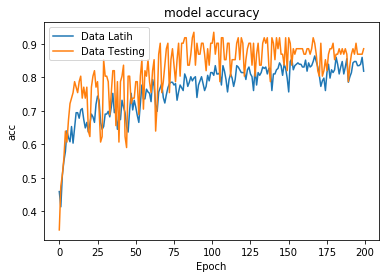

In [93]:
plt.plot(acc_training.history['acc'])
plt.plot(acc_training.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('acc')
plt.xlabel('Epoch')
plt.legend(['Data Latih', 'Data Testing'], loc='upper left')
plt.show()

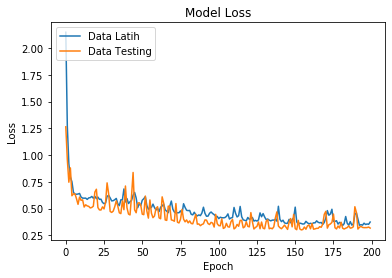

In [94]:
plt.plot(acc_training.history['loss'])
plt.plot(acc_training.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Data Latih', 'Data Testing'], loc='upper left')
plt.show()

In [95]:
prediction = model.predict_classes(X_test)

# Confusion Matrix

In [96]:
cm = confusion_matrix(Y_test, prediction)
tp = cm[0,0]
tn = cm[1,1]
fp = cm[0,1]
fn = cm[1,0]
print ("Confussion matriks:\n",cm)


Confussion matriks:
 [[27  5]
 [ 2 27]]


# Evaluasi Model dengan Confusion Matrix

Kinerja sistem yang diusulkan dihitung dengan berbagai metrik seperti akurasi, presisi, dan daya ingat. Akurasi dihitung dengan membagi jumlah prediksi yang benar dengan jumlah semua prediksi. Hasil yang diperoleh dikalikan dengan 100 untuk mendapatkan nilai sebagai persentase.

In [97]:
precision = tp / ( tp + fp)
recall = tp/(tp+fn)
f1=(2*precision*recall)/ (precision+recall)
akurasi = (tp+tn)/(tp+tn+fp+fn)
Sensitivity = tp/(tp + fn)

#menampilkan
print ("precesion : ",precision)
print("recall : ",recall)
print ("F1 : ",f1)
print("sensitivity : ",Sensitivity )
print("akurasi : ",akurasi)

precesion :  0.84375
recall :  0.9310344827586207
F1 :  0.8852459016393444
sensitivity :  0.9310344827586207
akurasi :  0.8852459016393442
